In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [2]:
df = pd.read_csv("forecast.csv", parse_dates=[0])
df.head()


,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   FullDate   92016 non-null  datetime64[ns]
 1   Tmax       92016 non-null  float64       
 2   SysLoad    92016 non-null  float64       
 3   GasPrice   92016 non-null  float64       
 4   ElecPrice  92016 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 3.5 MB


In [4]:
df.columns = df.columns.str.lower()


In [5]:
df.set_index("fulldate", inplace=True)

In [6]:
df.head()


,tmax,sysload,gasprice,elecprice
fulldate,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


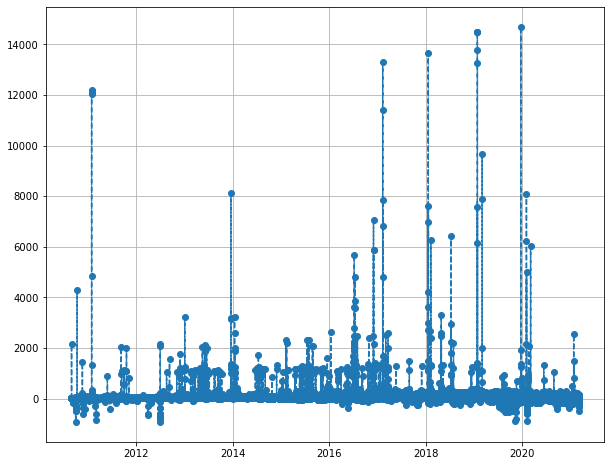

In [7]:
plt.figure(figsize=(10, 8))
plt.plot(df.index, df.elecprice, '--', marker="o")
plt.grid()


In [8]:
df.isnull().sum()


tmax         0
sysload      0
gasprice     0
elecprice    0
dtype: int64

In [9]:
df_copy = df.copy()

In [10]:
df_quarter_mean = df.resample("3M").mean()
df_quarter_sum = df.resample("3M").sum()


In [11]:
df_quarter_mean


,tmax,sysload,gasprice,elecprice
fulldate,,,,
2010-09-30,16.906667,1578.145819,3.578663,25.075896
2010-12-31,24.130435,1319.878557,2.509807,20.775752
2011-03-31,28.067778,1214.192279,3.397442,52.551697
2011-06-30,19.068132,1142.011119,3.870693,30.596067
2011-09-30,18.106522,1058.941325,3.867921,35.149934
2011-12-31,25.581522,1033.575510,3.409399,31.591309
2012-03-31,1127.085714,1084.247417,3.539455,26.147260
2012-06-30,19.213187,1119.287186,4.230834,28.139141
2012-09-30,16.975000,1035.770729,5.928257,65.745435


In [12]:
df_quarter_sum


,tmax,sysload,gasprice,elecprice
fulldate,,,,
2010-09-30,12172.8,1.136265e+06,2576.6376,18054.645
2010-12-31,53280.0,2.914292e+06,5541.6528,45872.860
2011-03-31,60626.4,2.622655e+06,7338.4752,113511.665
2011-06-30,41644.8,2.494152e+06,8453.5944,66821.810
2011-09-30,39979.2,2.338142e+06,8540.3688,77611.055
2011-12-31,56484.0,2.282135e+06,7527.9528,69753.610
2012-03-31,2461555.2,2.367996e+06,7730.1696,57105.615
2012-06-30,41961.6,2.444523e+06,9240.1416,61455.885
2012-09-30,37480.8,2.286982e+06,13089.5904,145165.920


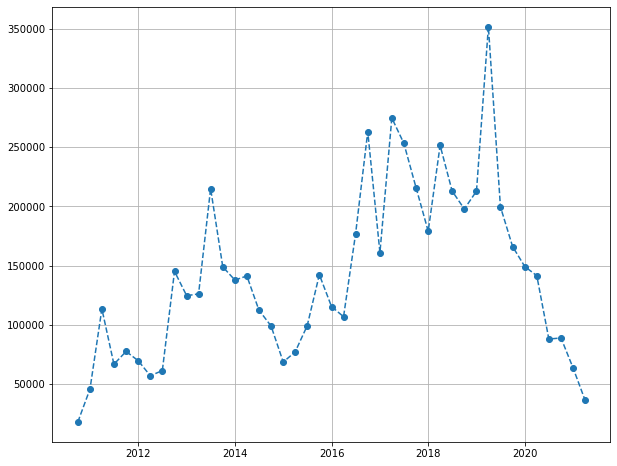

In [13]:
plt.figure(figsize=(10, 8))
plt.plot(df_quarter_sum.index, df_quarter_sum.elecprice, '--', marker="o")
plt.grid()


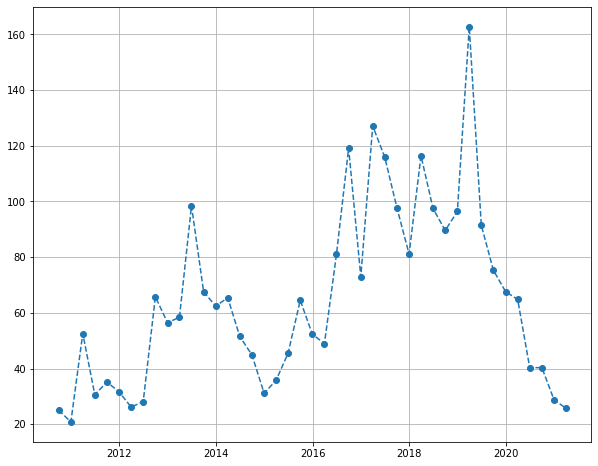

In [14]:
plt.figure(figsize=(10, 8))
plt.plot(df_quarter_mean.index, df_quarter_mean.elecprice, '--', marker="o")
plt.grid()


In [57]:
df_daily_mean = df.resample("3M").mean()
df_daily_sum = df.resample("3M").sum()


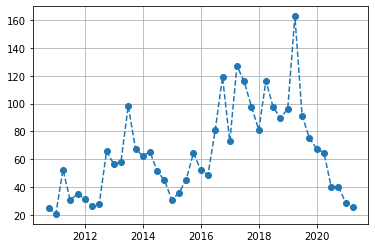

In [58]:
df_daily_mean
plt.plot(df_daily_mean.index, df_daily_mean.elecprice, '--', marker="o")
plt.grid()

#### **Decompose Series**


**Identifying components**

In [47]:
decompose_series = seasonal_decompose(
  df_daily_sum["elecprice"], model="additive"
)

In [48]:
decompose_series

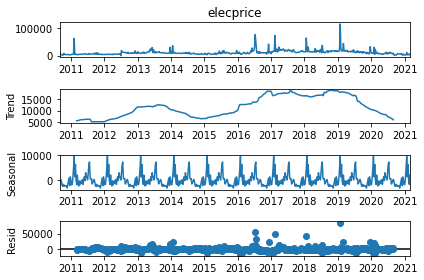

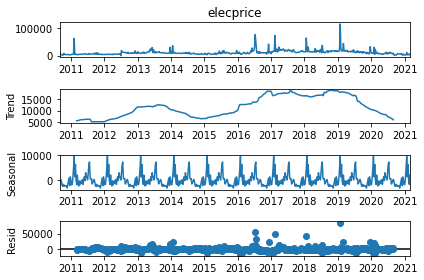

In [49]:
decompose_series.plot()

In [24]:
adf_result = adfuller(df["elecprice"])

print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print(f"No. of lags used: {adf_result[2]}")
print(f"No. of observations used: {adf_result[3]}")
print("Critical Values")
for k, v in adf_result[4].items():
  print(f"  {k}:{v}")

ADF Statistic: -31.95297569955788
p-value: 0.0
No. of lags used: 53
No. of observations used: 91962
Critical Values
  1%:-3.430421110703783
  5%:-2.8615714297867108
  10%:-2.56678672898094


In [33]:
df_yearly = df.resample("M").sum()
df_yearly

,tmax,sysload,gasprice,elecprice
fulldate,,,,
2010-09-30,12172.8,1.136265e+06,2576.6376,18054.645
2010-10-31,15904.8,1.040133e+06,2083.1904,16534.380
2010-11-30,17512.8,1.069027e+06,1671.7992,16254.680
2010-12-31,19862.4,8.051327e+05,1786.6632,13083.800
2011-01-31,22788.0,9.906195e+05,2170.9752,76702.385
...,...,...,...,...
2020-10-31,15902.4,9.159900e+04,4144.8264,24527.155
2020-11-30,20150.4,1.490015e+04,4343.1696,26442.180
2020-12-31,18991.2,-3.526690e+04,4711.8312,12490.995


In [34]:
df_elec = df_yearly[['elecprice']]

In [35]:
df_elec

,elecprice
fulldate,
2010-09-30,18054.645
2010-10-31,16534.380
2010-11-30,16254.680
2010-12-31,13083.800
2011-01-31,76702.385
...,...
2020-10-31,24527.155
2020-11-30,26442.180
2020-12-31,12490.995


In [36]:
df_elec_log = np.log(df_elec)
df_elec_diff = df_elec_log.diff(periods=1)

In [37]:
df_elec_diff

,elecprice
fulldate,
2010-09-30,NaN
2010-10-31,-0.087961
2010-11-30,-0.017061
2010-12-31,-0.217006
2011-01-31,1.768558
...,...
2020-10-31,0.805549
2020-11-30,0.075180
2020-12-31,-0.749952


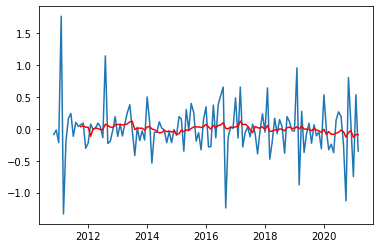

In [38]:
plt.plot(
  df_elec_diff.index, df_elec_diff.elecprice, '-'
)
plt.plot(
  df_elec_diff.rolling(12).mean(), color="red"
)